# Allstate Claims Severity 
### Pujan Malavia

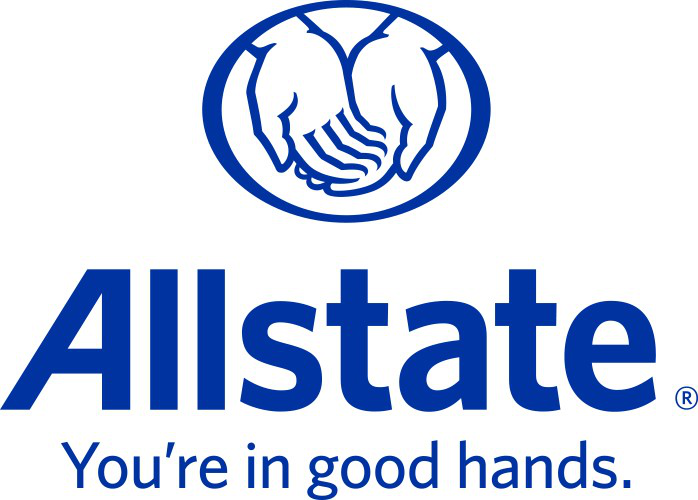

In [1]:
from IPython.display import display
from PIL import Image
path= "C:/Users/puj83/OneDrive/Portfolio/Allstate_Claims_Severity/allstate.jpg"
display(Image.open(path))

### Link to Dataset:
https://www.kaggle.com/c/allstate-claims-severity/data

### Abstract:
    
When you’ve been devastated by a serious car accident, your focus is on the things that matter the most: family, friends, and other loved ones. Pushing paper with your insurance agent is the last place you want your time or mental energy spent. This is why Allstate, a personal insurer in the United States, is continually seeking fresh ideas to improve their claims service for the over 16 million households they protect.

Allstate is currently developing automated methods of predicting the cost, and hence severity, of claims. In this recruitment challenge, Kagglers are invited to show off their creativity and flex their technical chops by creating an algorithm which accurately predicts claims severity. Aspiring competitors will demonstrate insight into better ways to predict claims severity for the chance to be part of Allstate’s efforts to ensure a worry-free customer experience.

### Industry:
    
Insurance

### Company Information: 
    
We are the Good Hands: We help people realize their hopes and dreams through products and services designed to protect them from life’s uncertainties and to prepare them for the future.

The Allstate Corporation is the largest publicly held personal lines property and casualty insurer in America. Allstate was founded in 1931 and became a publicly traded company in 1993. 

Allstate offers car insurance, home, property, condo and renters insurance, plus insurance for recreational vehicles like motorcycles, boats and more.

The Allstate family of companies offers financial products including college savings programs, retirement planning and a range of life insurance products including term life and whole life.

https://www.linkedin.com/company/allstate

https://www.allstate.com/

### Use Case:
Creating an algorithm which accurately predicts claims severity

### Tool:
Python (Jupyter Notebook)

### Initial Dataset(s):

train.csv - the training set

test.csv - the test set. You must predict the loss value for the ids in this file.

sample_submission.csv - a sample submission file in the correct format

### Data:

Each row in this dataset represents an insurance claim. You must predict the value for the 'loss' column. Variables prefaced with 'cat' are categorical, while those prefaced with 'cont' are continuous.

### Data Fields:

id

cat1

cat2
......

cat115

cat116

cont1

cont2
......

cont13

cont14

loss

### Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
# from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split

from scipy import stats
import seaborn as sns
from copy import deepcopy

%matplotlib inline

# This may raise an exception in earlier versions of Jupyter
%config InlineBackend.figure_format = 'retina'

### Importing Dataset(s) 

In [3]:
train = pd.read_csv('C:/Users/puj83/OneDrive/Portfolio/\Allstate_Claims_Severity/train.csv')
test = pd.read_csv('C:/Users/puj83/OneDrive/Portfolio/\Allstate_Claims_Severity/test.csv')

In [4]:
train.shape # Printing out dimensions of train dataset

(188318, 132)

In [5]:
test.shape # Printing out dimensions of test dataset

(125546, 131)

In [6]:
train.describe #

<bound method NDFrame.describe of             id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9    ...     \
0            1    A    B    A    B    A    A    A    A    B    ...      
1            2    A    B    A    A    A    A    A    A    B    ...      
2            5    A    B    A    A    B    A    A    A    B    ...      
3           10    B    B    A    B    A    A    A    A    B    ...      
4           11    A    B    A    B    A    A    A    A    B    ...      
5           13    A    B    A    A    A    A    A    A    B    ...      
6           14    A    A    A    A    B    A    A    A    A    ...      
7           20    A    B    A    B    A    A    A    A    B    ...      
8           23    A    B    B    B    B    A    A    A    B    ...      
9           24    A    B    A    A    B    B    A    A    B    ...      
10          25    A    B    A    A    A    A    A    A    B    ...      
11          33    A    B    A    A    B    A    A    A    B    ...      
12          34   

In [7]:
test.describe

<bound method NDFrame.describe of             id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9    ...     \
0            4    A    B    A    A    A    A    A    A    B    ...      
1            6    A    B    A    B    A    A    A    A    B    ...      
2            9    A    B    A    B    B    A    B    A    B    ...      
3           12    A    A    A    A    B    A    A    A    A    ...      
4           15    B    A    A    A    A    B    A    A    A    ...      
5           17    A    A    A    A    B    A    A    A    A    ...      
6           21    B    A    A    A    B    B    A    A    A    ...      
7           28    B    B    A    A    A    A    A    A    B    ...      
8           32    A    B    A    A    A    A    A    A    B    ...      
9           43    A    B    A    A    A    A    A    A    B    ...      
10          46    A    A    A    A    A    B    A    A    A    ...      
11          50    A    A    A    A    B    B    A    A    A    ...      
12          54   

In [8]:
print ('First 20 columns:', list(train.columns[:20]))
print ('Last 20 columns:', list(train.columns[-20:]))

First 20 columns: ['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19']
Last 20 columns: ['cat112', 'cat113', 'cat114', 'cat115', 'cat116', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss']


In [9]:
pd.isnull(train).values.any()

False

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [11]:
cat_features = list(train.select_dtypes(include=['object']).columns)
print ("Categorical: {} features".format(len(cat_features)))

Categorical: 116 features


In [12]:
cont_features = [cont for cont in list(train.select_dtypes(
                 include=['float64', 'int64']).columns) if cont not in ['loss', 'id']]
print ("Continuous: {} features".format(len(cont_features)))

Continuous: 14 features


In [13]:
id_col = list(train.select_dtypes(include=['int64']).columns)
print ("A column of int64: {}".format(id_col))

A column of int64: ['id']


In [14]:
cat_uniques = []
for cat in cat_features:
    cat_uniques.append(len(train[cat].unique()))
    
uniq_values_in_categories = pd.DataFrame.from_items([('cat_name', cat_features), ('unique_values', cat_uniques)])

C:\Users\puj83\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """


In [15]:
uniq_values_in_categories.head()

,cat_name,unique_values
0,cat1,2
1,cat2,2
2,cat3,2
3,cat4,2
4,cat5,2


Text(7, 71, 'Binary features')

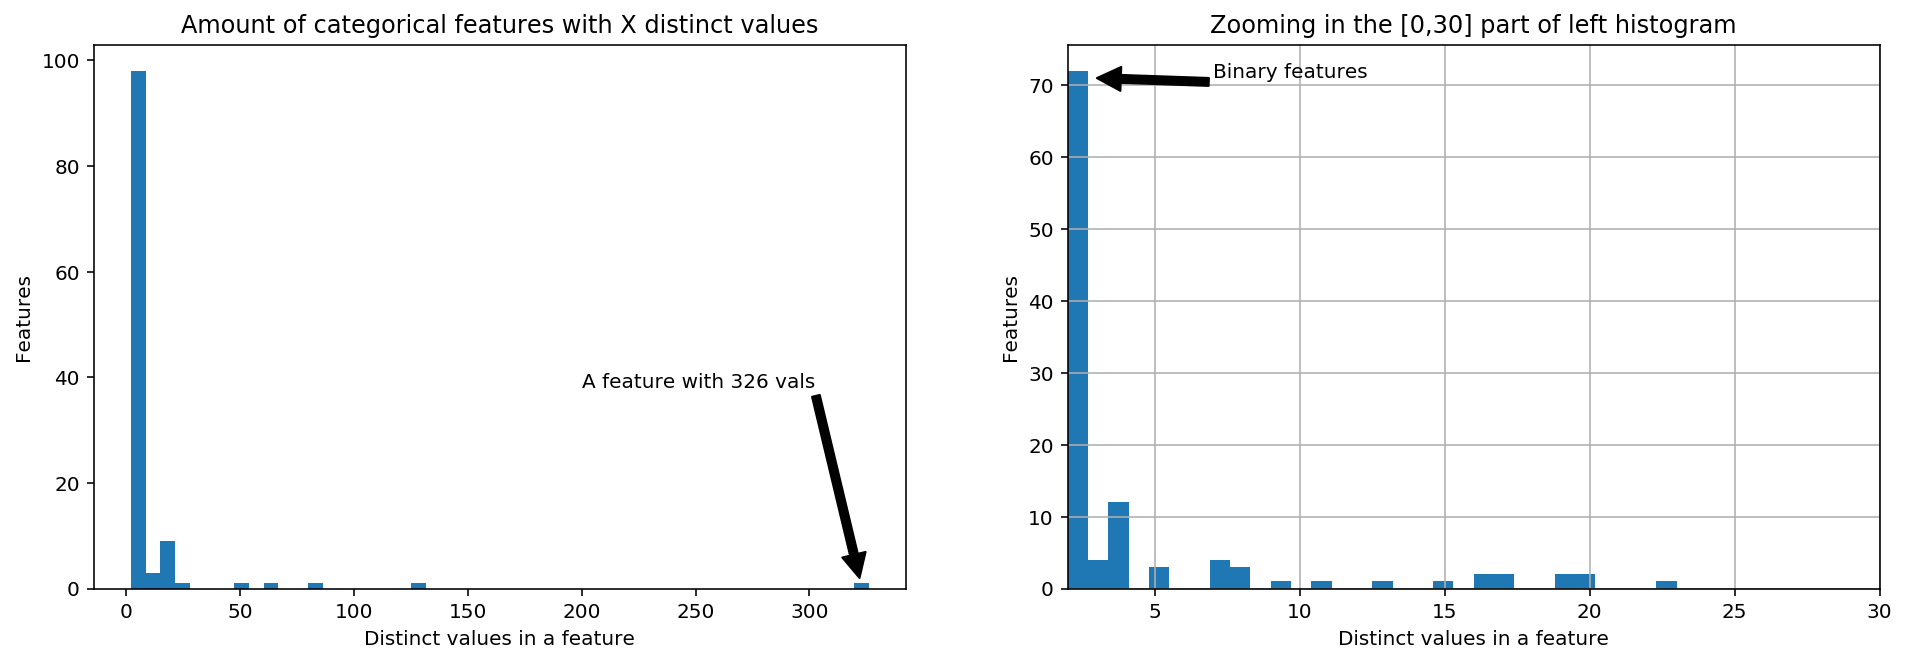

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax1.hist(uniq_values_in_categories.unique_values, bins=50)
ax1.set_title('Amount of categorical features with X distinct values')
ax1.set_xlabel('Distinct values in a feature')
ax1.set_ylabel('Features')
ax1.annotate('A feature with 326 vals', xy=(322, 2), xytext=(200, 38), arrowprops=dict(facecolor='black'))

ax2.set_xlim(2,30)
ax2.set_title('Zooming in the [0,30] part of left histogram')
ax2.set_xlabel('Distinct values in a feature')
ax2.set_ylabel('Features')
ax2.grid(True)
ax2.hist(uniq_values_in_categories[uniq_values_in_categories.unique_values <= 30].unique_values, bins=30)
ax2.annotate('Binary features', xy=(3, 71), xytext=(7, 71), arrowprops=dict(facecolor='black'))

In [17]:
# Another option is to use Series.value_counts() method, but its
# output is not that nice

uniq_values = uniq_values_in_categories.groupby('unique_values').count()
uniq_values = uniq_values.rename(columns={'cat_name': 'categories'})
uniq_values.sort_values(by='categories', inplace=True, ascending=False)
uniq_values.reset_index(inplace=True)
print (uniq_values)

    unique_values  categories
0               2          72
1               4          12
2               3           4
3               7           4
4               5           3
5               8           3
6              20           2
7              19           2
8              17           2
9              16           2
10             15           1
11             13           1
12             11           1
13              9           1
14             23           1
15             51           1
16             61           1
17             84           1
18            131           1
19            326           1


No handles with labels found to put in legend.


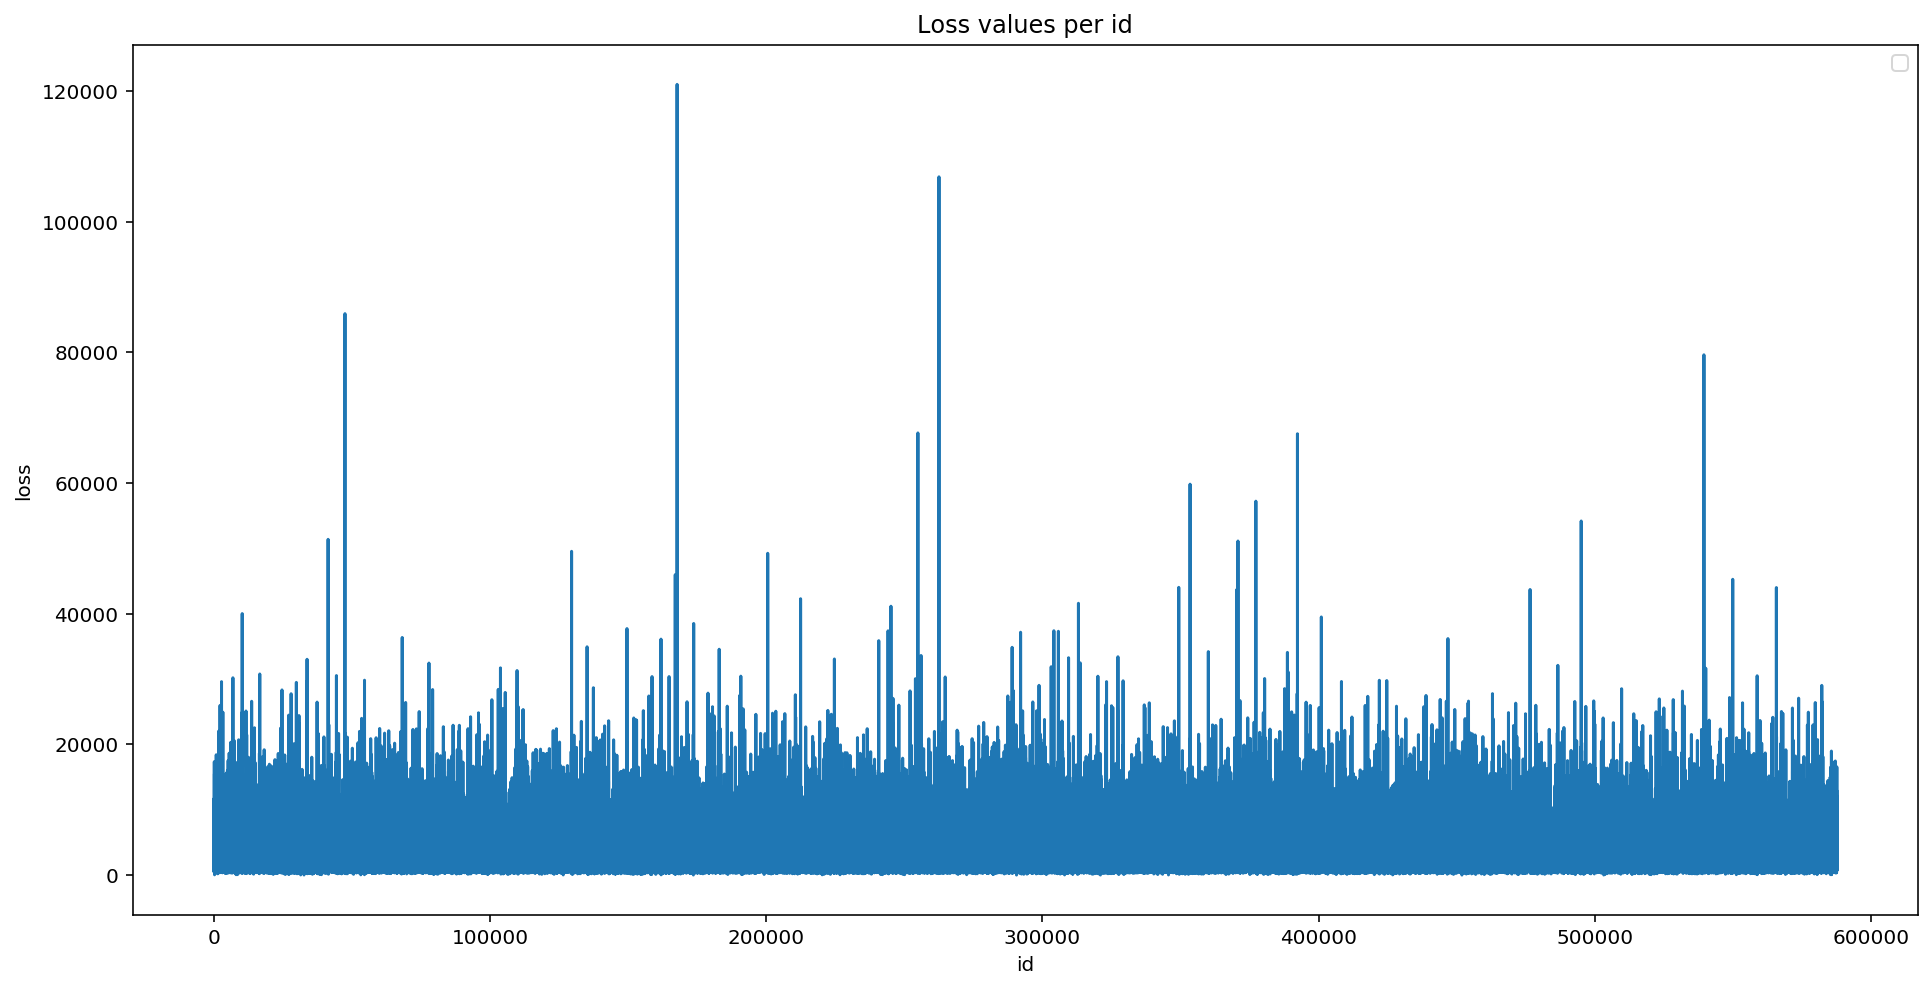

In [18]:
plt.figure(figsize=(16,8))
plt.plot(train['id'], train['loss'])
plt.title('Loss values per id')
plt.xlabel('id')
plt.ylabel('loss')
plt.legend()
plt.show()

In [19]:
stats.mstats.skew(train['loss']).data

array(3.79492815)

In [20]:
stats.mstats.skew(np.log(train['loss'])).data

array(0.0929738)

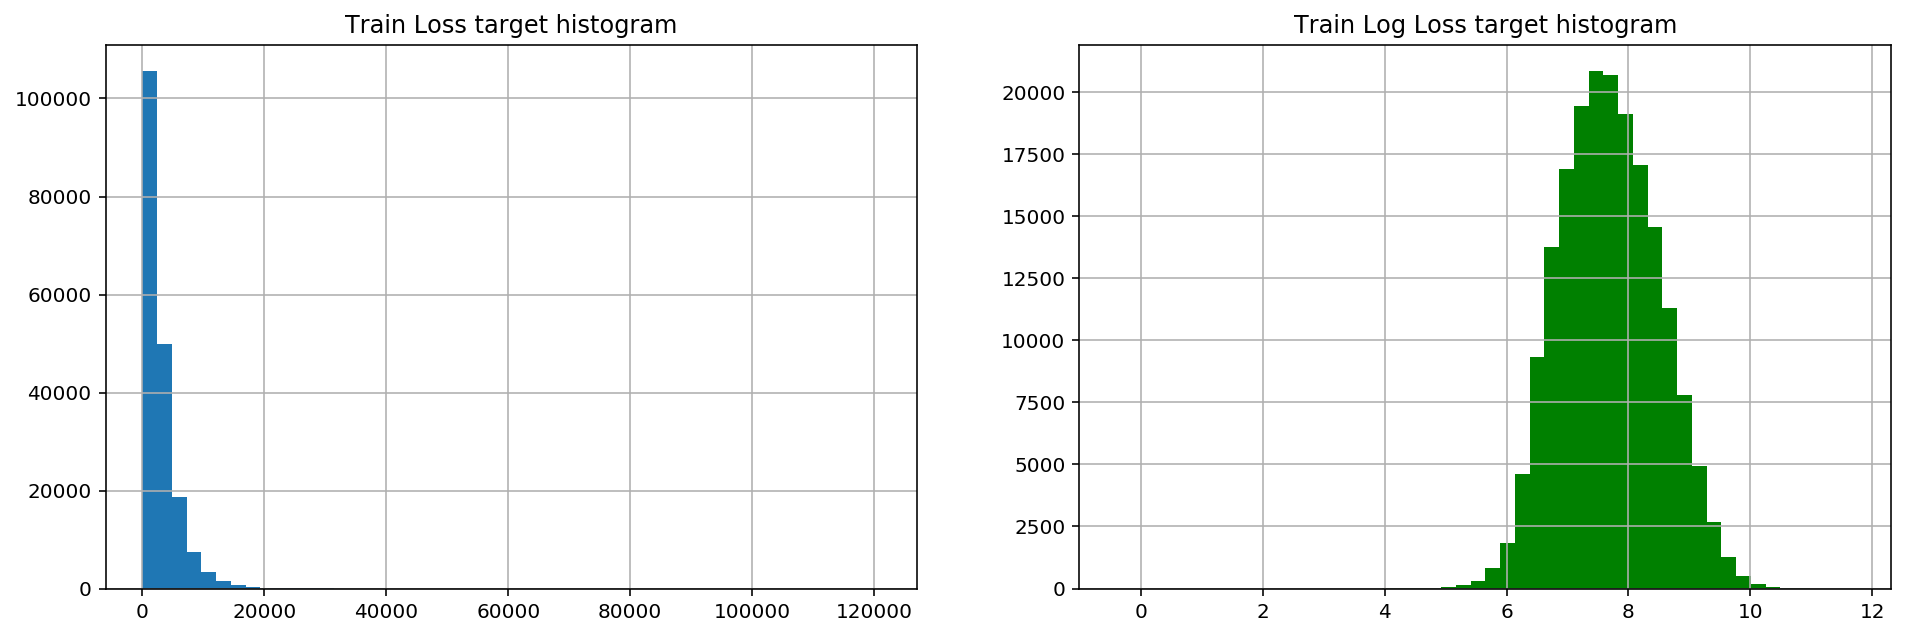

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax1.hist(train['loss'], bins=50)
ax1.set_title('Train Loss target histogram')
ax1.grid(True)
ax2.hist(np.log(train['loss']), bins=50, color='g')
ax2.set_title('Train Log Loss target histogram')
ax2.grid(True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B180A30DC8>,
      dtype=object)

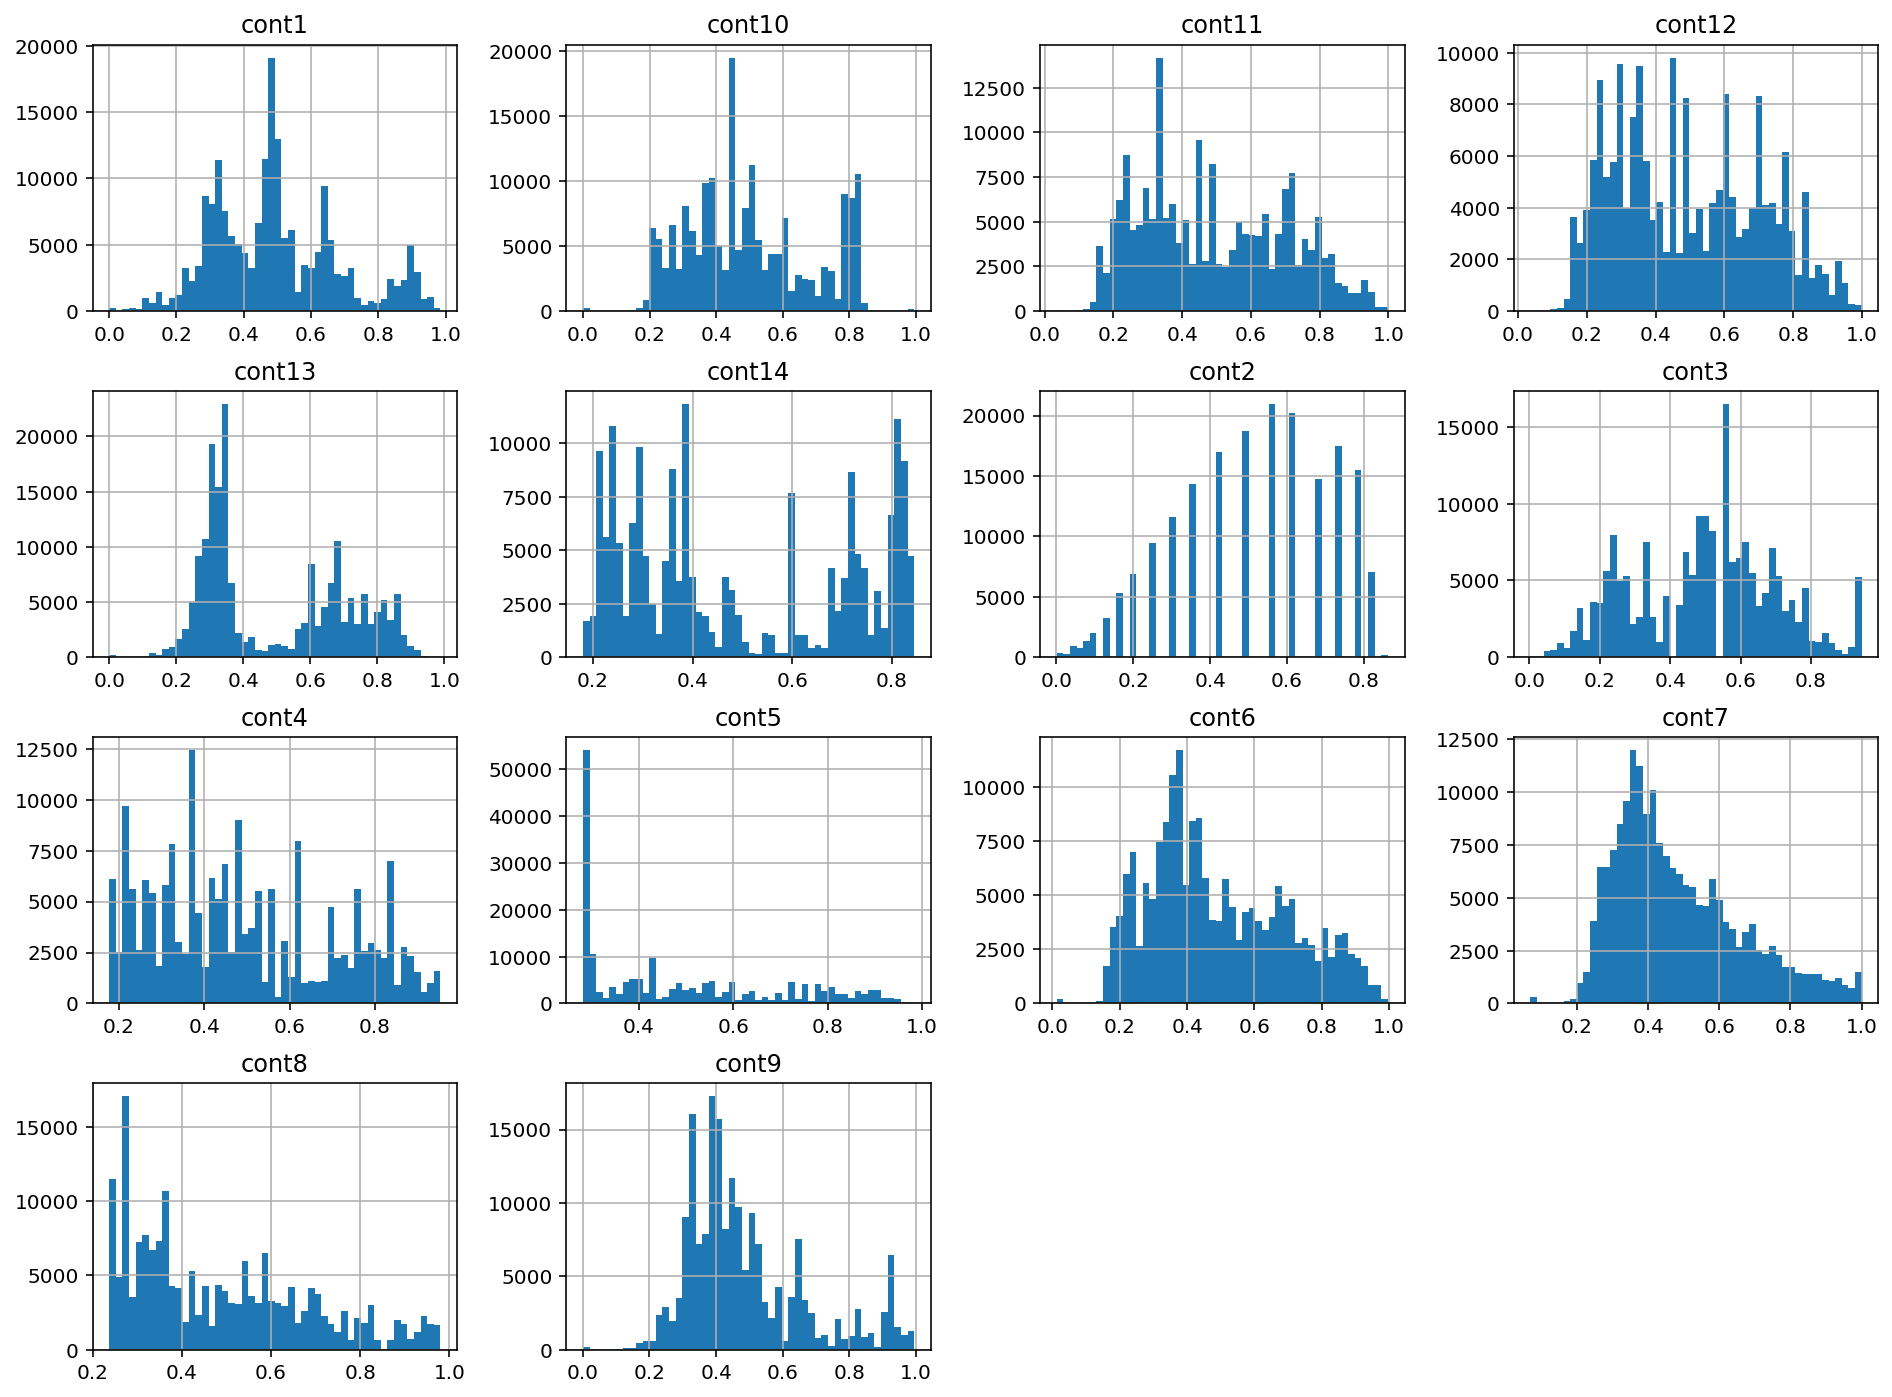

In [22]:
train[cont_features].hist(bins=50, figsize=(16,12))

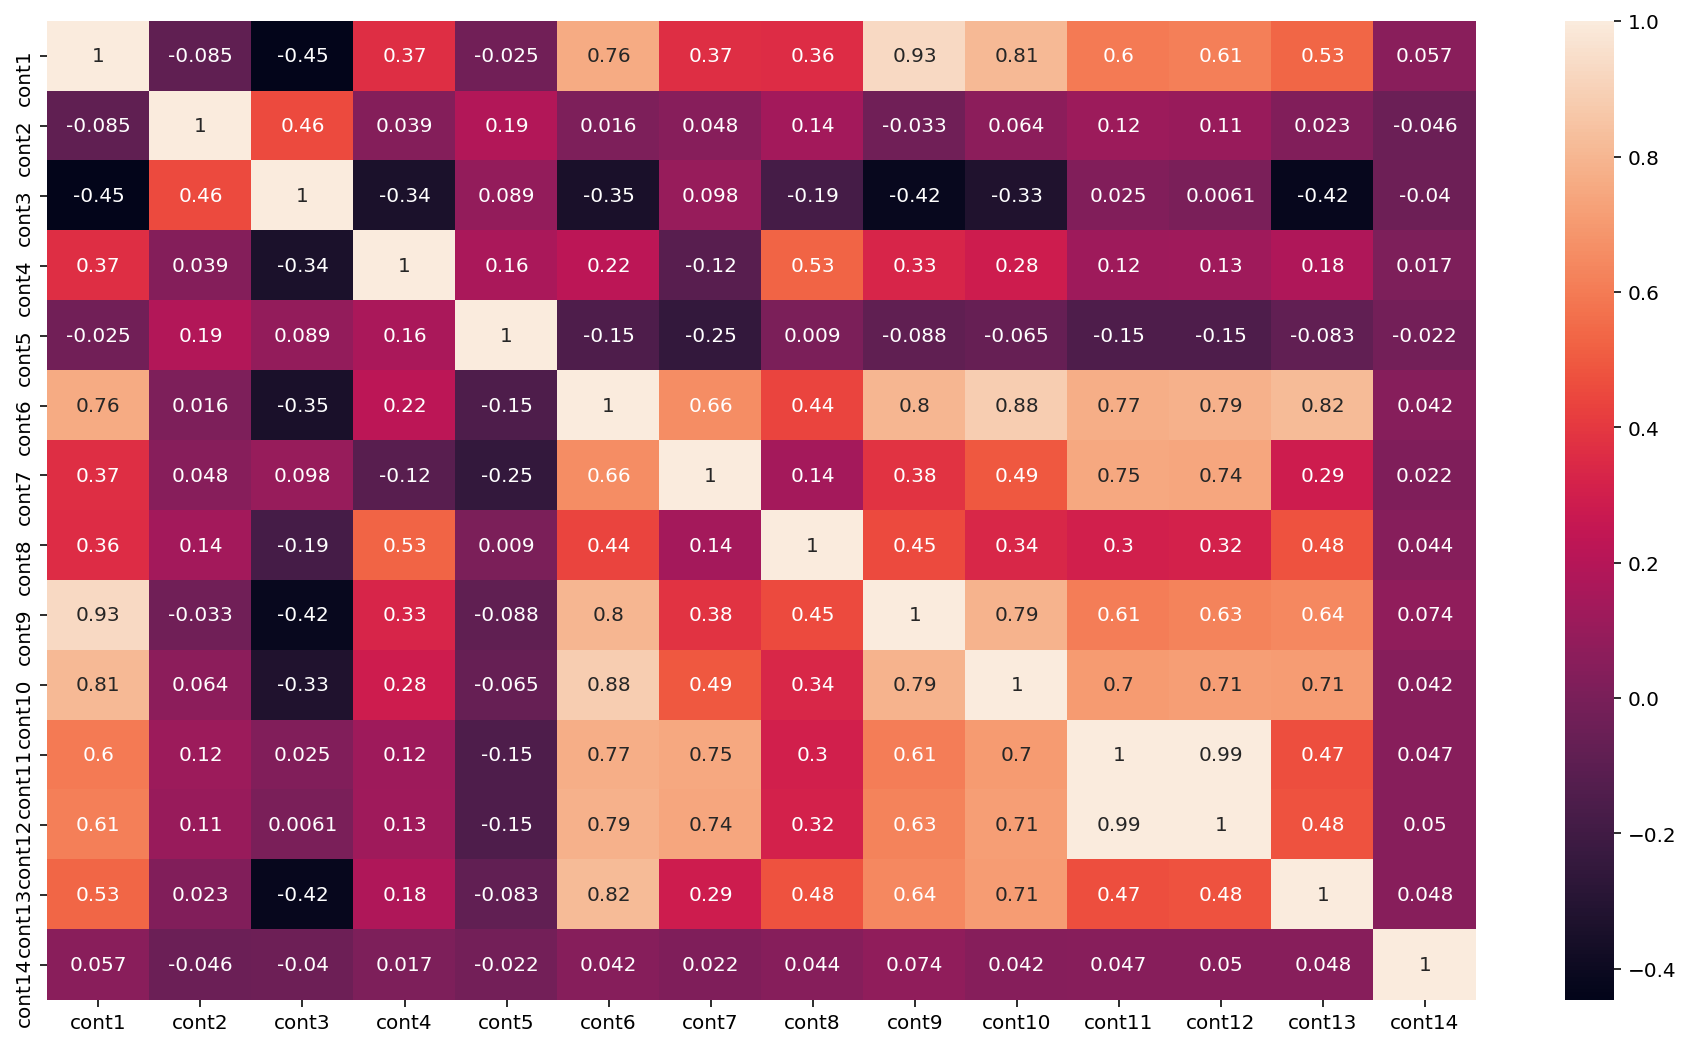

In [23]:
plt.subplots(figsize=(16,9))
correlation_mat = train[cont_features].corr()
sns.heatmap(correlation_mat, annot=True)

In [24]:
# Simple data preparation

train_d = train.drop(['id','loss'], axis=1)
test_d = test.drop(['id'], axis=1)

# To make sure we can distinguish between two classes
train_d['Target'] = 1
test_d['Target'] = 0

# We concatenate train and test in one big dataset
data = pd.concat((train_d, test_d))

# We use label encoding for categorical features:
data_le = deepcopy(data)
for c in range(len(cat_features)):
    data_le[cat_features[c]] = data_le[cat_features[c]].astype('category').cat.codes

# We use one-hot encoding for categorical features:
data = pd.get_dummies(data=data, columns=cat_features)

In [25]:
data = data.iloc[np.random.permutation(len(data))]
data.reset_index(drop = True, inplace = True)

x = data.drop(['Target'], axis = 1)
y = data.Target

train_examples = 100000

x_train = x[:train_examples]
x_test = x[train_examples:]
y_train = y[:train_examples]
y_test = y[train_examples:]

In [26]:
# Logistic Regression:
clf = LogisticRegression()
clf.fit(x_train, y_train)
pred = clf.predict_proba(x_test)[:,1]
auc = AUC(y_test, pred)
print ("Logistic Regression AUC: {:.2%}".format(auc))

# Random Forest, a simple model (100 trees) trained in parallel
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
clf.fit(x_train, y_train)
pred = clf.predict_proba(x_test)[:,1]
auc = AUC(y_test, pred)
print ("Random Forest AUC: {:.2%}".format(auc))

C:\Users\puj83\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression AUC: 50.05%
Random Forest AUC: 49.79%
